In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import pdb
import glob
import matplotlib.pyplot as plt
import os
import shutil
from google_drive_downloader import GoogleDriveDownloader as gdd


In [53]:
try:
    if os.path.exists('feats'):
        shutil.rmtree('feats')
    os.makedirs('feats')
except Exception as e:
    print(e)


In [5]:
#the link to download combined.pkl
file_id = '1AmIJQ2oo7Cy1w32T8d1v-rXiJKM0wZE-'

#load in the data and labels
#gdd.download_file_from_google_drive(file_id=file_id, dest_path='./combined.pkl')


In [56]:
df = pd.read_pickle('combined.pkl')

In [57]:
df.head(10)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,patient
0,80.0,100.0,36.50,121.00,58.0,41.00,13.5,NaN,1.0,25.0,...,223.0,160.0,77.27,1,0.0,1.0,-69.14,3,0,p014977
1,76.0,100.0,36.25,113.25,61.0,41.50,12.0,NaN,1.0,25.0,...,NaN,NaN,77.27,1,0.0,1.0,-69.14,4,0,p014977
2,80.0,100.0,36.25,132.75,71.5,46.25,12.0,NaN,NaN,NaN,...,NaN,NaN,77.27,1,0.0,1.0,-69.14,5,0,p014977
3,78.0,100.0,36.10,103.50,58.0,43.00,12.0,NaN,-3.0,NaN,...,NaN,NaN,77.27,1,0.0,1.0,-69.14,6,0,p014977
4,74.0,100.0,36.00,128.75,69.5,44.50,12.5,NaN,-3.0,NaN,...,NaN,NaN,77.27,1,0.0,1.0,-69.14,7,0,p014977
5,76.0,100.0,36.20,124.00,65.0,41.50,14.0,NaN,0.0,25.0,...,NaN,169.0,77.27,1,0.0,1.0,-69.14,8,0,p014977
6,70.0,100.0,36.10,120.25,65.0,43.00,14.0,NaN,0.0,25.0,...,NaN,NaN,77.27,1,0.0,1.0,-69.14,9,0,p014977
7,67.0,100.0,36.40,130.50,73.0,49.00,14.0,NaN,0.0,NaN,...,NaN,NaN,77.27,1,0.0,1.0,-69.14,10,0,p014977
8,64.5,100.0,36.55,116.75,62.5,42.50,14.0,NaN,0.0,NaN,...,NaN,NaN,77.27,1,0.0,1.0,-69.14,11,0,p014977
9,65.0,99.0,36.90,117.50,61.0,43.50,21.0,NaN,NaN,24.0,...,NaN,154.0,77.27,1,0.0,1.0,-69.14,12,0,p014977


##### 39 Numerical predictors + 1 text predcotor + 1 label (42 Varibles in dataset)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 42 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   HR                1398811 non-null  float64
 1   O2Sat             1349474 non-null  float64
 2   Temp              525226 non-null   float64
 3   SBP               1325945 non-null  float64
 4   MAP               1358940 non-null  float64
 5   DBP               1065656 non-null  float64
 6   Resp              1313875 non-null  float64
 7   EtCO2             57636 non-null    float64
 8   BaseExcess        84145 non-null    float64
 9   HCO3              65028 non-null    float64
 10  FiO2              129365 non-null   float64
 11  pH                107573 non-null   float64
 12  PaCO2             86301 non-null    float64
 13  SaO2              53561 non-null    float64
 14  AST               25183 non-null    float64
 15  BUN               106568 non-null   float64
 16  

In [59]:
print(f'Shape of the data: {df.shape}')

Shape of the data: (1552210, 42)


In [60]:
#get the percentage missing for each column
print('Percentage Missing:')
print(df.isna().sum()/len(df))

#columns to drop
#drop Unit2 because Unit1 and Unit2 are mutually exclusive
#drop ICULOS as it's basically just an index
cols_to_drop = ['Unit2', 'ICULOS']
df = df.drop(cols_to_drop, axis=1)

#columns with < 15% missing data, and continuous data. these will be retained as time series
cols_cont = ['HR', 'MAP', 'O2Sat', 'SBP', 'Resp']

#columns with continuous data and > 15% missing data
cols_to_bin = ['Unit1', 'Gender', 'HospAdmTime', 
               'Age', 'DBP', 'Temp', 'Glucose', 'Potassium', 
               'Hct', 'FiO2', 'Hgb', 'pH', 'BUN', 'WBC', 
               'Magnesium', 'Creatinine', 'Platelets', 
               'Calcium', 'PaCO2', 'BaseExcess', 'Chloride', 
               'HCO3', 'Phosphate', 'EtCO2', 'SaO2', 'PTT', 
               'Lactate', 'AST', 'Alkalinephos', 'Bilirubin_total', 
               'TroponinI', 'Fibrinogen', 'Bilirubin_direct']


Percentage Missing:
HR                  0.098826
O2Sat               0.130611
Temp                0.661627
SBP                 0.145770
MAP                 0.124513
DBP                 0.313459
Resp                0.153546
EtCO2               0.962868
BaseExcess          0.945790
HCO3                0.958106
FiO2                0.916658
pH                  0.930697
PaCO2               0.944401
SaO2                0.965494
AST                 0.983776
BUN                 0.931344
Alkalinephos        0.983932
Calcium             0.941161
Chloride            0.954603
Creatinine          0.939044
Bilirubin_direct    0.998074
Glucose             0.828943
Lactate             0.973299
Magnesium           0.936896
Phosphate           0.959863
Potassium           0.906891
Bilirubin_total     0.985092
TroponinI           0.990477
Hct                 0.911460
Hgb                 0.926176
PTT                 0.970559
WBC                 0.935932
Fibrinogen          0.993402
Platelets           0.9

##### Percentage of missing data in decreasing order

In [61]:
#get the percentage missing for each column and ranking them in decreasing order
print('Percentage Missing in decreasing order:')
sorted(zip(df.columns, list(df.isna().sum()/len(df))), reverse = True, key = lambda x: x[1]) 

Percentage Missing in decreasing order:


[('Bilirubin_direct', 0.9980737142525818),
 ('Fibrinogen', 0.9934016660116866),
 ('TroponinI', 0.9904774482834152),
 ('Bilirubin_total', 0.985091579103343),
 ('Alkalinephos', 0.9839319421985427),
 ('AST', 0.9837760354591196),
 ('Lactate', 0.9732987160242493),
 ('PTT', 0.9705587517152963),
 ('SaO2', 0.9654937154122187),
 ('EtCO2', 0.9628684263082959),
 ('Phosphate', 0.9598630339966886),
 ('HCO3', 0.9581061840859162),
 ('Chloride', 0.9546027921479696),
 ('BaseExcess', 0.9457901959142127),
 ('PaCO2', 0.9444012085993518),
 ('Calcium', 0.9411606676931601),
 ('Platelets', 0.9405950225807075),
 ('Creatinine', 0.9390443303418996),
 ('Magnesium', 0.9368957808543947),
 ('WBC', 0.9359319937379608),
 ('BUN', 0.931344341294026),
 ('pH', 0.9306968773555124),
 ('Hgb', 0.9261755819122413),
 ('FiO2', 0.9166575398947308),
 ('Hct', 0.911459789590326),
 ('Potassium', 0.906890820185413),
 ('Glucose', 0.8289432486583646),
 ('Temp', 0.6616269705774348),
 ('Unit1', 0.3942507779230903),
 ('DBP', 0.313458874765

In [61]:
df.SepsisLabel.value_counts()

0    1524294
1      27916
Name: SepsisLabel, dtype: int64

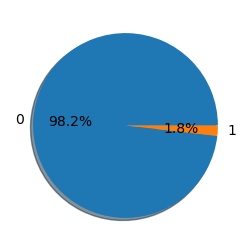

In [21]:
plt.rcParams["figure.figsize"] = (3,3)
plt.pie(df['SepsisLabel'].value_counts(), labels=['0','1'], autopct='%1.1f%%', shadow=True)
plt.show()

In [15]:
np.unique(df['SepsisLabel'].values)

array([0, 1])

In [62]:
patients_training_data = df['patient'].unique()
np.random.shuffle(patients_training_data)
patients_training_data = patients_training_data[0:-6000]

df_mean_std = df[df['patient'].isin(patients_training_data)].describe().loc[['mean', 'std']]
df_mean_std.to_pickle('mean_std_scaling.pkl')

In [63]:
print('Number of positive training examples:')
sum(df[df['patient'].isin(patients_training_data)]['SepsisLabel']==1)

Number of positive training examples:


23869

In [64]:
#loop through each patient at a time
save_count = 0
windowed_df_list = []
grouped_by_patient = df.groupby('patient')
for patient, group in grouped_by_patient:
    #print(patient)
    group = group.reset_index(drop=True)

    #backfill any missing values for the continuous variables with < 15% missing data
    group = group.assign(HR=group['HR'].fillna(method='bfill').fillna(method='ffill'))
    group = group.assign(MAP=group['MAP'].fillna(method='bfill').fillna(method='ffill'))
    group = group.assign(O2Sat=group['O2Sat'].fillna(method='bfill').fillna(method='ffill'))
    group = group.assign(SBP=group['SBP'].fillna(method='bfill').fillna(method='ffill'))
    group = group.assign(Resp=group['Resp'].fillna(method='bfill').fillna(method='ffill'))
    
    #standardize the continous data
    group = group.assign(HR=(group['HR']-df_mean_std['HR']['mean'])/(df_mean_std['HR']['std']))
    group = group.assign(MAP=(group['MAP']-df_mean_std['MAP']['mean'])/(df_mean_std['MAP']['std']))
    group = group.assign(O2Sat=(group['O2Sat']-df_mean_std['O2Sat']['mean'])/(df_mean_std['O2Sat']['std']))
    group = group.assign(SBP=(group['SBP']-df_mean_std['SBP']['mean'])/(df_mean_std['SBP']['std']))
    group = group.assign(Resp=(group['Resp']-df_mean_std['Resp']['mean'])/(df_mean_std['Resp']['std']))

    #generate windows of 10 hours, predicting one sample into the future
    windowed_data = []
    N = len(group)
    win_len = 10
    pred_len = 1
    i = 0
    while(i+win_len+pred_len <= N):
        tmp_data = group.iloc[i:i+win_len]
        tmp_label = group.iloc[i+win_len:i+win_len+pred_len]
        tmp_label = int(any(tmp_label['SepsisLabel']))
        tmp_patient = patient

        #slide the window forward
        i = i+1

        #get all the continuous variables into one group
        X_cont = tmp_data[cols_cont]
        X_cont = X_cont.values

        #if any of the continuous variables is nan (in other words, there wasn't even a single value to 
        #backfill/forwardfill) then just skip this window
        if np.isnan(X_cont).any(): continue

        #process each of the variables to be binned
        X_binned_dict = {}
        for col_to_bin in cols_to_bin:
            tmp_val = tmp_data[col_to_bin].median()
            if col_to_bin not in ['Gender', 'Unit1']:
                tmp_val = (tmp_val-df_mean_std[col_to_bin]['mean'])/df_mean_std[col_to_bin]['std']
                
            X_binned_dict[col_to_bin] = tmp_val
        
        #package it all into a dictionary
        tmp_dict = X_binned_dict
        tmp_dict['X_cont'] = X_cont
        tmp_dict['label'] = tmp_label
        tmp_dict['patient'] = tmp_patient
        windowed_data.append(tmp_dict)
        
    #append the dataframe to the list of dataframes
    windowed_data_df = pd.DataFrame(windowed_data)
    windowed_df_list.append(windowed_data_df)

    #periodically save every 500 patients
    if (int(patient[-5:]) % 500) == 0:
        print('patient %i' % int(patient[-5:]))
        windowed_df = pd.concat(windowed_df_list).reset_index(drop=True)
        train = windowed_df[windowed_df['patient'].isin(patients_training_data)].drop('patient', axis=1)
        test = windowed_df[~windowed_df['patient'].isin(patients_training_data)].drop('patient', axis=1)

        train.to_pickle('feats/train_%i.pkl' % save_count)
        test.to_pickle('feats/test_%i.pkl' % save_count)

        windowed_df_list = []
        save_count = save_count+1

#save any remaining data
if len(windowed_df_list) > 0:
    #separate the training and testing data
    windowed_df = pd.concat(windowed_df_list).reset_index(drop=True)
    train = windowed_df[windowed_df['patient'].isin(patients_training_data)].drop('patient', axis=1)
    test = windowed_df[~windowed_df['patient'].isin(patients_training_data)].drop('patient', axis=1)

    train.to_pickle('feats/train_%i.pkl' % save_count)
    test.to_pickle('feats/test_%i.pkl' % save_count)

patient 500
patient 1000
patient 1500
patient 2000
patient 2500
patient 3000
patient 3500
patient 4000
patient 4500
patient 5000
patient 5500
patient 6000
patient 6500
patient 7000
patient 7500
patient 8000
patient 8500
patient 9000
patient 9500
patient 10000
patient 10500
patient 11000
patient 11500
patient 12000
patient 12500
patient 13000
patient 13500
patient 14000
patient 14500
patient 15000
patient 15500
patient 16000
patient 16500
patient 17000
patient 17500
patient 18000
patient 18500
patient 19000
patient 19500
patient 20000
patient 20500
patient 500
patient 1000
patient 1500
patient 2000
patient 2500
patient 3000
patient 3500
patient 4000
patient 4500
patient 5000
patient 5500
patient 6000
patient 6500
patient 7000
patient 7500
patient 8000
patient 8500
patient 9000
patient 9500
patient 10000
patient 10500
patient 11000
patient 11500
patient 12000
patient 12500
patient 13000
patient 13500
patient 14000
patient 14500
patient 15000
patient 15500
patient 16000
patient 16500
pati

In [65]:
#load the training data
train_files = glob.glob('feats/train_*.pkl')
train = []
for train_file in train_files:
    train.append(pd.read_pickle(train_file))

train = pd.concat(train)

#load the test data
test_files = glob.glob('feats/test_*.pkl')
test = []
for test_file in test_files:
    test.append(pd.read_pickle(test_file))

test = pd.concat(test)

/tmp/ipykernel_248731/481013269.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()
/tmp/ipykernel_248731/481013269.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


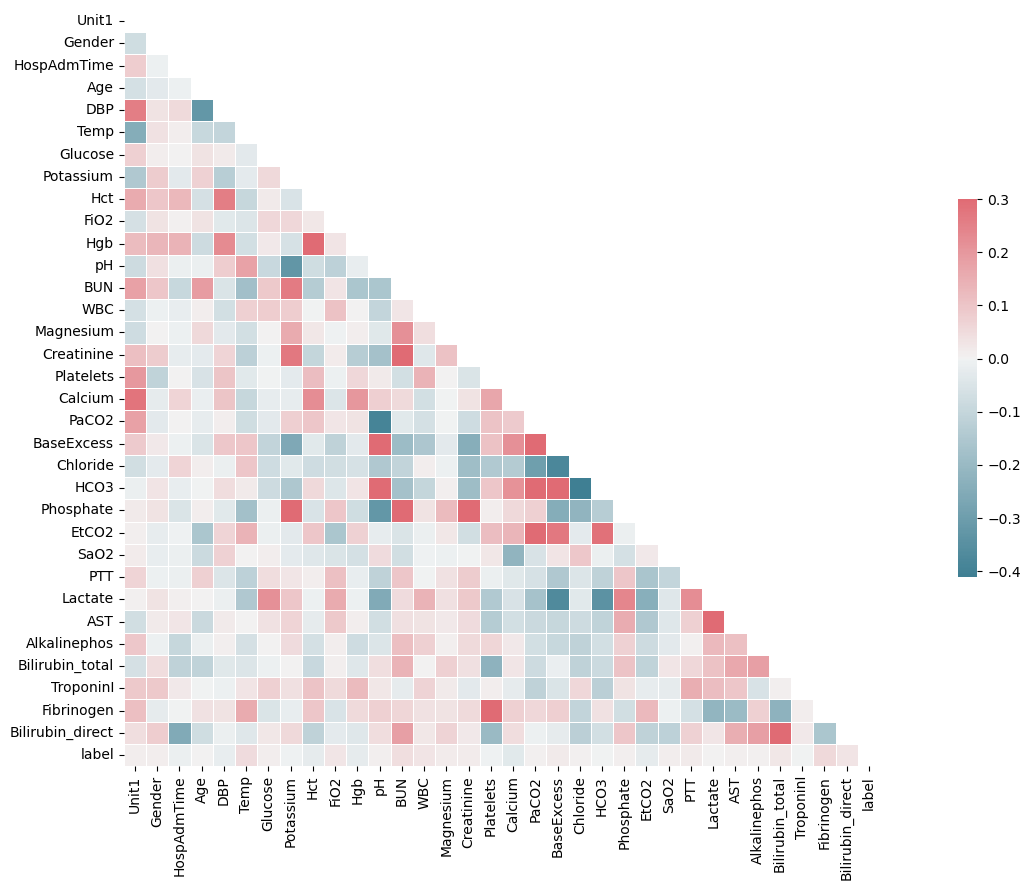

In [66]:
#look at feature correlations
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#make the heatmap plot
plt.figure(figsize=(16,9))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.tight_layout()
plt.savefig('heatmap.png', dpi=250)
plt.show()

#save the data
train.to_pickle('train.pkl', protocol=4)
test.to_pickle('test.pkl', protocol=4)

In [67]:
train.to_csv('train.csv')
test.to_csv('test.csv')

In [47]:
train['X_cont'][0].shape

(65,)

In [48]:
train.shape

(970964, 35)

In [30]:
# drop demographic and the outcome Variable
df_demo = df.iloc[:100 , :-7]

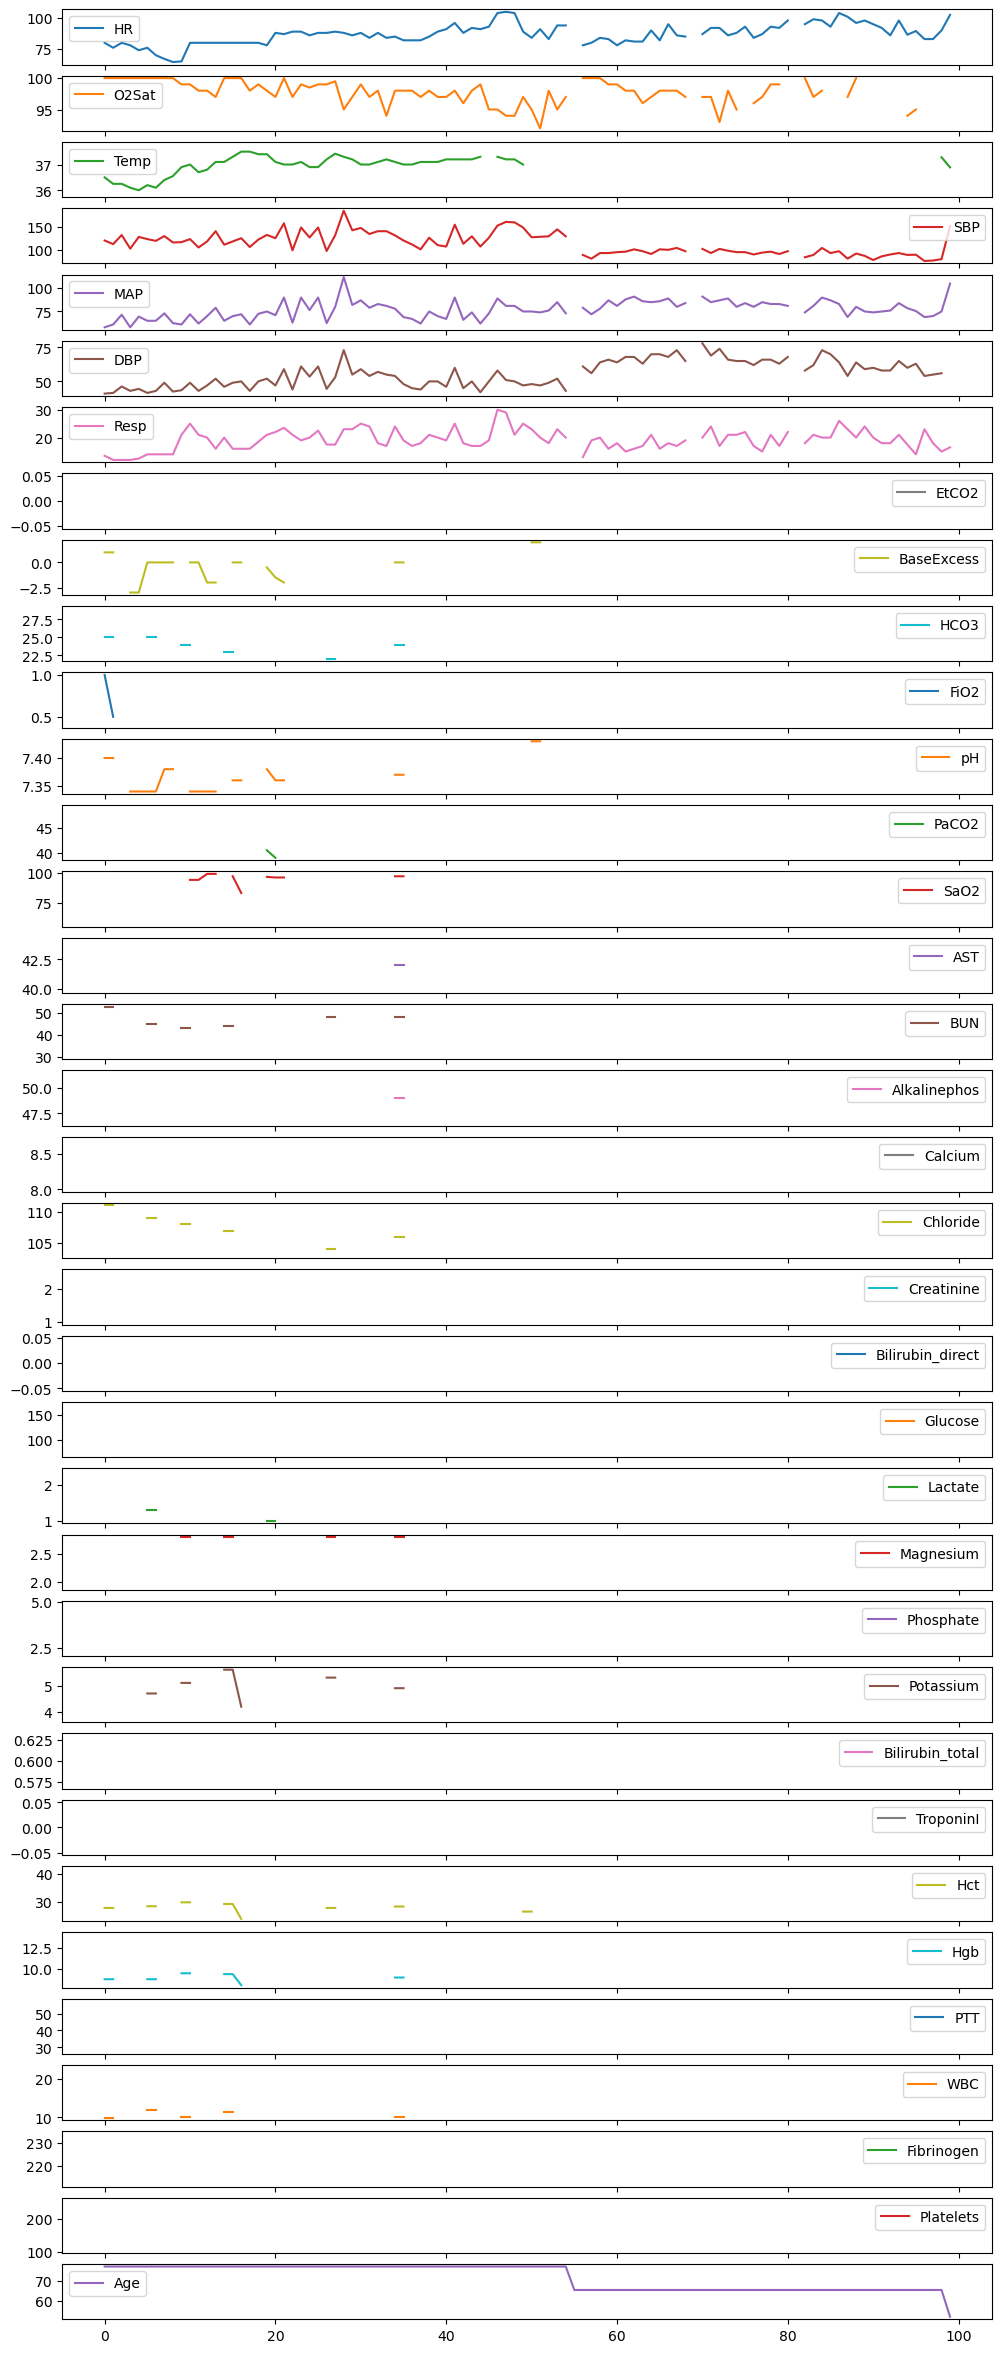

In [4]:
plt.rcParams["figure.figsize"] = (12,30)
df_demo.plot(subplots=True, legend=True)
plt.show()

In [41]:
df_demo.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen'],
      dtype='object')

In [45]:
df_demo['HR']

0      80.0
1      76.0
2      80.0
3      78.0
4      74.0
      ...  
95     89.5
96     83.0
97     83.0
98     90.0
99    102.5
Name: HR, Length: 100, dtype: float64

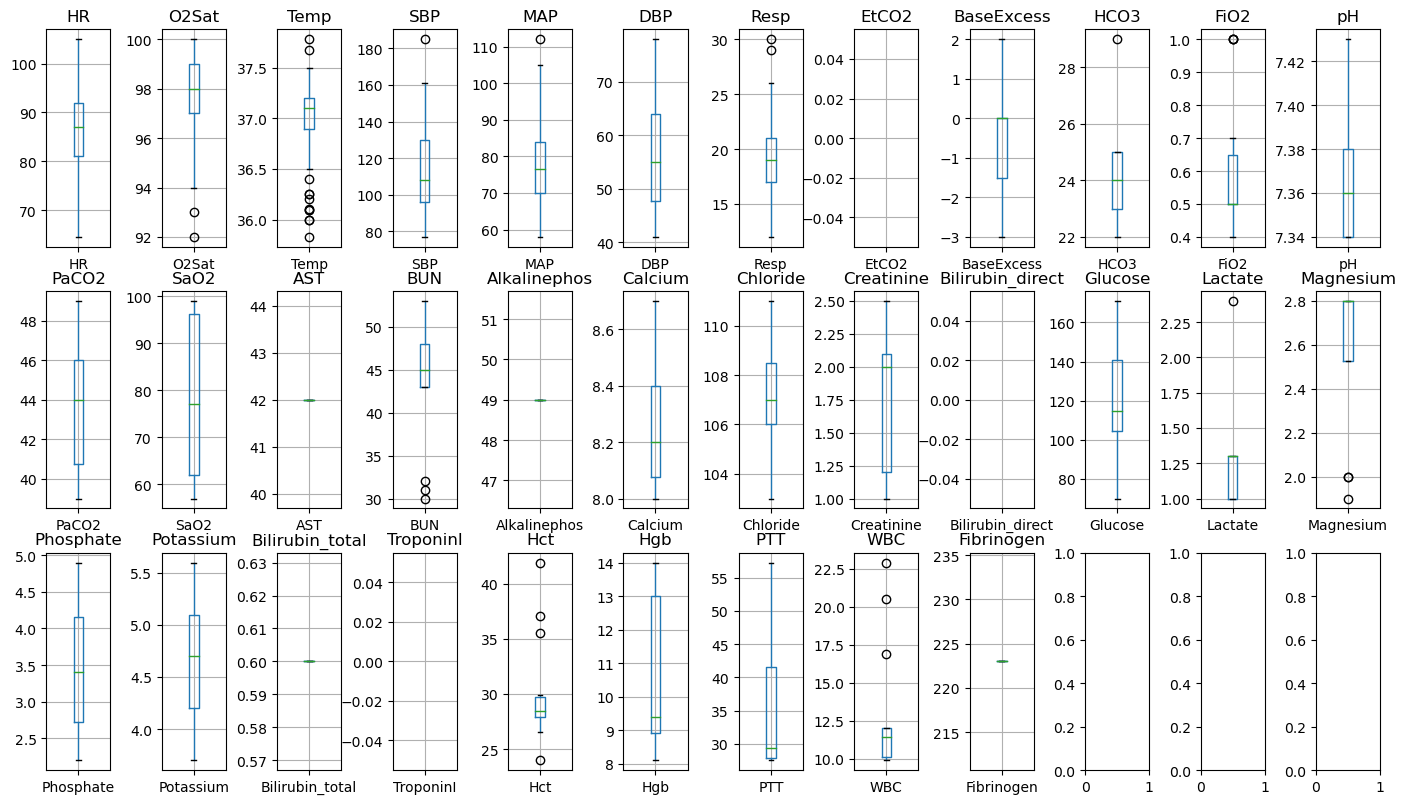

In [47]:
plt.rcParams["figure.figsize"] = (14,8)
fig, axs = plt.subplots(3, 12)
fig.tight_layout()
for n,u in enumerate(df_demo.columns):
    plt.subplot(3,12,n+1)
    df_demo.boxplot(column=u)
    plt.title(u)
plt.savefig('outlier.png', dpi=250)
plt.show() 

TypeError: no numeric data to plot

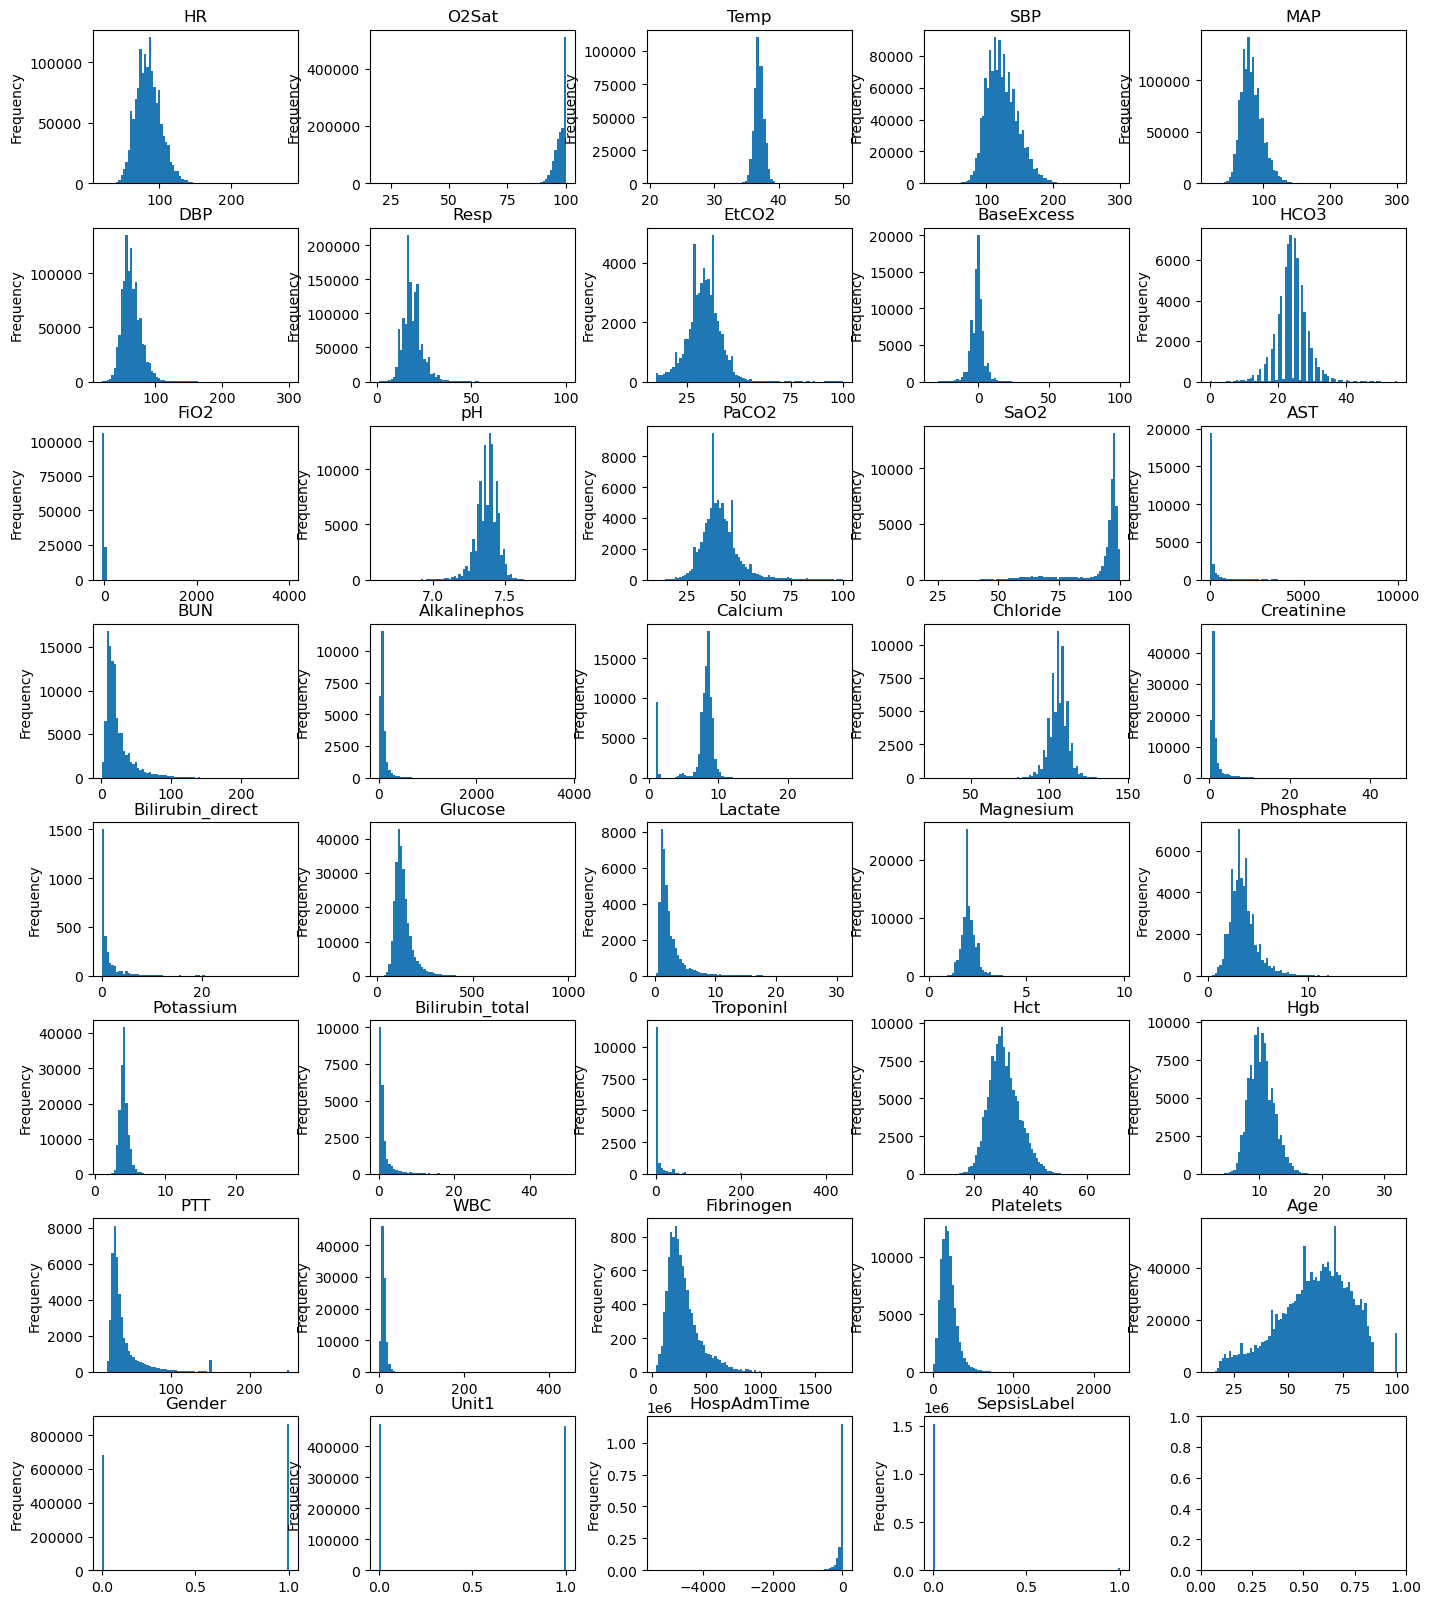

In [49]:
plt.rcParams["figure.figsize"] = (14,16)
fig, axs = plt.subplots(8, 5)
fig.tight_layout()
for n,u in enumerate(df.columns):
    plt.subplot(8,5,n+1)
    df[u].plot(kind='hist', bins = 80)
    plt.title(u)
    
    plt.savefig('histo.png', dpi=250)
plt.show()   